In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [4]:
def divided_difference(nodes, values):
    if len(nodes) == 1:
        return values[0]
    return (divided_difference(nodes[1::], values[1::]) - divided_difference(nodes[0:-1:], values[0:-1:])) / (nodes[len(nodes)-1] - nodes[0])

In [5]:
def newton_poly(nodes, values, x):
    res = 0
    multiplier = 1
    n = len(nodes)
    
    for k in range(0, n):
        current = divided_difference(nodes[0:k+1], values[0:k+1])*multiplier
        res+=current
        multiplier*= (x-nodes[k])
        
    return res     

In [9]:
runge_function = lambda x : 1 / (1+25*x**2)

In [14]:
chebyshev_node = lambda k : np.cos(((2*k - 1) / (2 * 10)) * np.pi)

In [22]:
nodes = np.array(list(chebyshev_node(k) for k in range(1,12)))

In [24]:
values = runge_function(nodes)

In [28]:
abs_error = lambda x : abs(runge_function(x) - newton_poly(nodes, values, x))

In [25]:
x_axis = np.linspace(-1,1,1000)

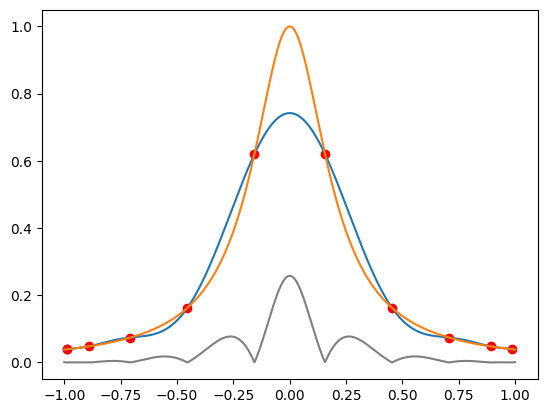

In [33]:
plt.scatter(nodes,values, color = 'red')
plt.plot(x_axis, newton_poly(nodes, values, x_axis))
plt.plot(x_axis, runge_function(x_axis))
plt.plot(x_axis, abs_error(x_axis), color = 'grey')
plt.le